### Importing the necessary packages

In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

### Reading the train.csv Pandas file

In the first line we read the train.csv file using Pandas.
In the second line as a safe backup we keep a copy of our original train.csv file. We make a copy of train data so that even if we have to make any changes in this dataset we would not lose the original dataset.

In [3]:
train = pd.read_csv('train_E6oV3lV.csv')

train_original=train.copy()
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
train.shape

(31962, 3)

As you can see we have 3 attributes present in our dataset and a total of 31962 labeled tweets , ‘1’ standing for tweets with negative sentiment and ‘0’ for tweets with positive sentiments.

### Reading the test.csv Pandas file

In the first line we read the test.csv file using Pandas.
In the second line as a safe backup we keep a copy of our original test.csv file. We make a copy of test data so that even if we have to make any changes in this dataset we would not lose the original dataset.

In [7]:
test = pd.read_csv('test_tweets_anuFYb8.csv')

test_original=test.copy()

In [8]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [9]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [11]:
test.shape

(17197, 2)

As we can see we have 2 attributes present here that is ‘id’ and ‘tweets’. This is the dataset on which we are going to test our Machine Learning models so it is unlabeled.

### Data Pre-Processing

Let’s begin with the pre-processing of our dataset.

### STEP — 1 :
#### Combine the train.csv and test.csv files.

Pandas dataframe.append() function is used to append rows of other dataframe to the end of the given dataframe, returning a new dataframe object.

In [12]:
combine = train.append(test,ignore_index=True,sort=True)

### Overview of the combined train and test dataset.

In [13]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [14]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


Columns not in the original dataframes are added as new columns and the new cells are populated with NaN value.

### STEP — 2
#### Removing Twitter Handles(@User)

In our analysis we can clearly see that the Twitter handles do not contribute anything significant to solve our problem. So it’s better if we remove them in our dataset.

Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [15]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

Here NumPy Vectorization ‘np.vectorize()’ is used because it is much more faster than the conventional for loops when working on datasets of medium to large sizes.

In [16]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### STEP — 3
#### Removing Punctuation, Numbers, and Special Characters

Punctuation, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles. Here we will replace everything except characters and hashtags with spaces.

In [17]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


### STEP — 4
#### Removing Short Words

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. These words are also known as Stop Words.

For example, terms like “hmm”, “and”, “oh” are of very little use. It is better to get rid of them.

In [18]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


### STEP — 5
#### Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

Here we tokenize our sentences because we will apply Stemming from the “NLTK” package in the next step.

In [19]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

### STEP — 6
#### Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

For example — “play”, “player”, “played”, “plays” and “playing” are the different variations of the word — “play”

In [20]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

Now let’s stitch these tokens back together

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


So finally these are the basic steps to follow when we have to Pre-Process a dataset containing textual data.

## Data Visualisation


So Data Visualisation is one of the most important steps in Machine Learning projects because it gives us an approximate idea about the dataset and what it is all about before proceeding to apply different machine learning models.

So, let’s dive in.

### WordCloud
One of the popular visualisation techniques is WordCloud.



#### WordCloud is a visualisation wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

So, in Python we have a package for generating WordCloud.

Let’s dive into the code to see how can we generate a WordCloud.

Importing packages necessary for generating a WordCloud

In [22]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

### Generating WordCloud for tweets with label ‘0’.
Store all the words from the dataset which are non-racist/sexist.

In [23]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

In [24]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

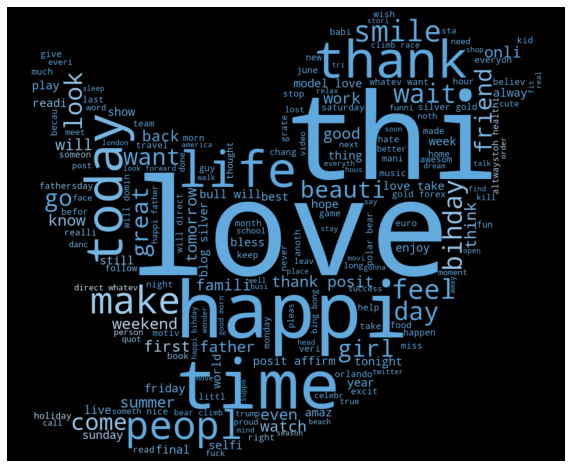

In [25]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. With happy, smile, and love being the most frequent ones. Hence, most of the frequent words are compatible with tweets in positive sentiment.

### Generating WordCloud for tweets with label ‘1‘.
#### Store all the words from the dataset which are non-racist/sexist.

In [26]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

In [27]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

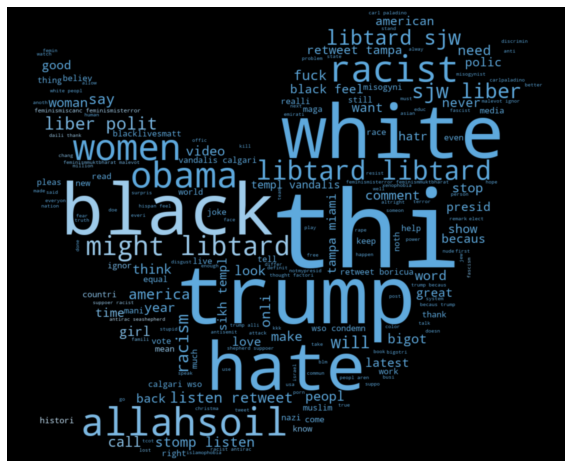

In [28]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

We can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on.

#### Understanding the impact of Hashtags on tweets sentiment

Hash-tagging on Twitter can have a major impact when it comes to your follower count by using general and non-specific hashtags. If you hashtag general words, like #creative, or events, like #TIFF, that are going on, it is more likely that your tweet will reach beyond your follower list.

So we will look how we can extract the hashtags and see which hashtags fall into which category.

### Function to extract hashtags from tweets

In [29]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

A nested list of all the hashtags from the positive reviews from the dataset.

In [30]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

#### Here we unnest the list

In [31]:
ht_positive_unnest = sum(ht_positive,[])


A nested list of all the hashtags from the negative reviews from the dataset

In [32]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

Here we unnest the list

In [33]:
ht_negative_unnest = sum(ht_negative,[])

### Plotting Bar-plots

### For Positive Tweets in the dataset
Counting the frequency of the words having Positive Sentiment

In [34]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

### Creating a dataframe for the most frequently used words in hashtags

In [35]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


Plotting the barplot for the 20 most frequent words used for hashtags

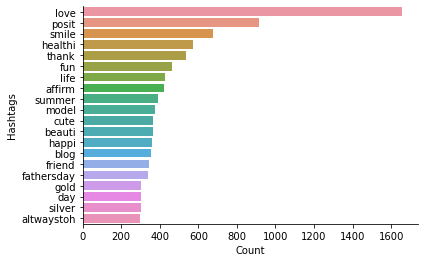

In [36]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

### For Negative Tweets in the dataset
Counting the frequency of the words having Negative Sentiment

In [37]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

Creating a dataframe for the most frequently used words in hashtags

In [38]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


Plotting the barplot for the 20 most frequent words used for hashtags

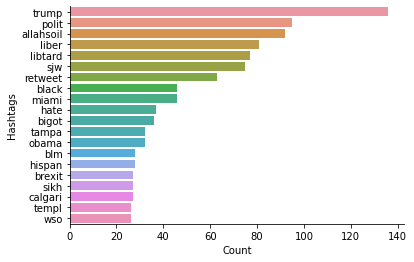

In [39]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

## Extracting Features from cleaned Tweets
### Bag-of-Words Features
Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set.

Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

For example, if you have 2 documents-

D1: He is a lazy boy. She is also lazy.
D2: Smith is a lazy person.
First, it creates a vocabulary using unique words from all the documents.

### [‘He’ , ’She’ , ’lazy’ , ‘boy’ , ‘Smith’ , ’person’]

As we can see in the above list we don’t consider “is” , “a” , “also” in this set because they don’t convey the necessary information required for the model.

Here, D=2, N=6
The matrix M of size 2 X 6 will be represented as:


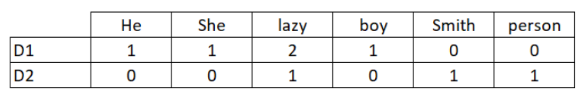

The above table depicts the training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach.

So,let’s apply this word embedding technique to our available dataset.

We have a package called CountVectorizer to perform this task.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Features
TF-IDF stands for Term Frequency-Inverse Document Frequency, and the TF-IDF weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

Typically, the TF-IDF weight is composed by two terms:

#### Term Frequency (TF) :
The first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document.

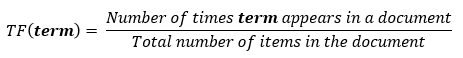

Example :-

Consider a document containing 100 words wherein the word cat appears 3 times.

The Term Frequency (TF) for cat is then (3 / 100) = 0.03

#### Inverse Document Frequency (IDF) :
The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

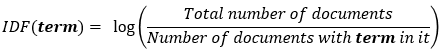

#### Example :-

Assume we have 10 million documents and the word cat appears in one thousand of these.

Then, the Inverse Document Frequency (IDF) is calculated as

log(10,000,000 / 1,000) = 4.

#### TF-IDF Example :
Formula for finding the TF-IDF weight :-

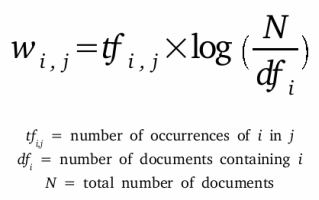

From the above examples the Term Frequency is 0.03 and Inverse Document Frequency is 4.

Thus, the TF-IDF weight is the product of these quantities : 0.03 * 4 = 0.12.

Let us apply this technique to our dataset using Python.

We have a package available for this in Scikit-Learn known as TfidfVectorizer.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


These are the Word Embedding techniques which we have used on our dataset for feature extraction.m

### Splitting our dataset into Training and Validation Set

From the above two techniques that is Bag-of-Words and TF-IDF we have extracted features from the tweets present in our dataset.

Now, we have one dataset with features from the Bag-of-Words model and another dataset with features from TF-IDF model.

First task is to split the dataset into training and validation set so that we can train and test our model before applying it to predict for unseen and unlabeled test data.

#### Using the features from Bag-of-Words for training set

In [42]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Using features from TF-IDF for training set

In [43]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Splitting the data into training and validation set

In [44]:
from sklearn.model_selection import train_test_split

Bag-of-Words Features

In [45]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

TF-IDF features

In [46]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

#### Applying Machine Learning Models
The underlying problem we are going to solve comes under the Supervised Machine Learning category. So, let us have a brief discussion about this topic before moving on to apply different Machine Learning models on our dataset.

#### Supervised Machine Learning :-
The majority of practical machine learning uses supervised learning.

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)
The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

Supervised learning problems can be further grouped into regression and classification problems.

#### Classification:
A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease” or in our case “Positive” or “Negative”
#### Regression: 
A regression problem is when the output variable is a real value, such as “dollars” or “weight”.
Our problem comes under the classification category because we have to classify our results into either Positive or Negative class.

There is another category of Machine Learning algorithm called Unsupervised Machine Learning where you have an input data but no corresponding output variables. The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data. But that is of no concern for us for this problem statement.

#### Moving on :-
So from the above splitting of dataset we see that we will use features from the Bag-of-Words and TF-IDF for our Machine Learning Models.

We generally use different models to see which best fits our dataset and then we use that model for predicting results on the test data.

Here we will use 3 different models

#### Logistic Regression
#### XGBoost
#### Decision Trees
and then we will compare their performance and choose the best possible model with the best possible feature extraction technique for predicting results on our test data.

### Importing f1_score from sklearn
We will use F1 Score throughout to asses our model’s performance instead of accuracy. You will get to know why at the end of this article.

In [47]:
from sklearn.metrics import f1_score

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

#### Bag-of-Words Features
Fitting the Logistic Regression Model.

In [49]:
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

Predicting the probabilities.

In [50]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

The output basically provides us with the probabilities of the tweet falling into either of the classes that is Negative or Positive.

#### Calculating the F1 score

In [51]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5721352019785655

### TF-IDF Features
Fitting the Logistic Regression Model.

In [52]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

Predicting the probabilities.

In [53]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98487907, 0.01512093],
       [0.97949889, 0.02050111],
       [0.9419737 , 0.0580263 ],
       ...,
       [0.98630906, 0.01369094],
       [0.96746188, 0.03253812],
       [0.99055287, 0.00944713]])

Calculating the F1 Score

In [54]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5862068965517241

### XGBoost
The next model we use is XGBoost.

In [55]:
from xgboost import XGBClassifier

Bag-of-Words Features

In [56]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

Fitting the XGBoost Model

In [57]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, ...)

Predicting the probabilities.

In [58]:
xgb = model_bow.predict_proba(x_valid_bow)

xgb

array([[9.9109417e-01, 8.9058345e-03],
       [9.9910688e-01, 8.9310389e-04],
       [9.2758572e-01, 7.2414286e-02],
       ...,
       [8.9067906e-01, 1.0932093e-01],
       [9.2758572e-01, 7.2414286e-02],
       [9.2758572e-01, 7.2414286e-02]], dtype=float32)

Calculating the F1 Score

In [59]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.5811023622047244

### TF-IDF Features

In [60]:
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)

Fitting the XGBoost model

In [61]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=29,
              reg_alpha=0, reg_lambda=1, ...)

Predicting the probabilities.

In [62]:
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9958908 , 0.00410918],
       [0.9872918 , 0.01270822],
       [0.9527768 , 0.04722321],
       ...,
       [0.99192214, 0.00807783],
       [0.9852176 , 0.01478244],
       [0.9974108 , 0.0025892 ]], dtype=float32)

Calculating the F1 Score

In [63]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:, 1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score

0.5792

### Decision Trees

In [64]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

#### Bag-of-Words Features
Fitting the Decision Tree model.

In [65]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Predicting the probabilities.

In [66]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Calculating the F1 Score

In [67]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.5141776937618148

Fitting the Decision Tree model

In [68]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Predicting the probabilities.

In [69]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Calculating the F1 Score

In [70]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5498821681068342

### Model Comparison
Now, let us compare the different models we have applied on our dataset with different word embedding techniques.

#### Bag of Words

In [71]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow,xgb_bow,dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.572135,0.581102,0.514178


Comparison Graph

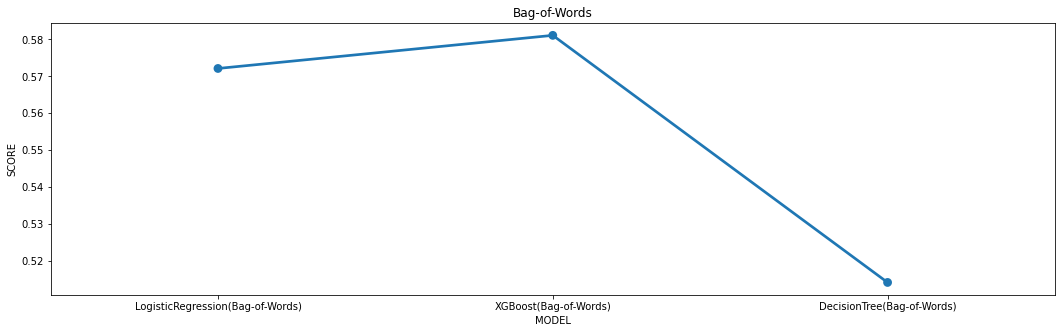

In [72]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

#### TF-IDF

In [73]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,score,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.586207,0.5792,0.549882


Comparison Graph

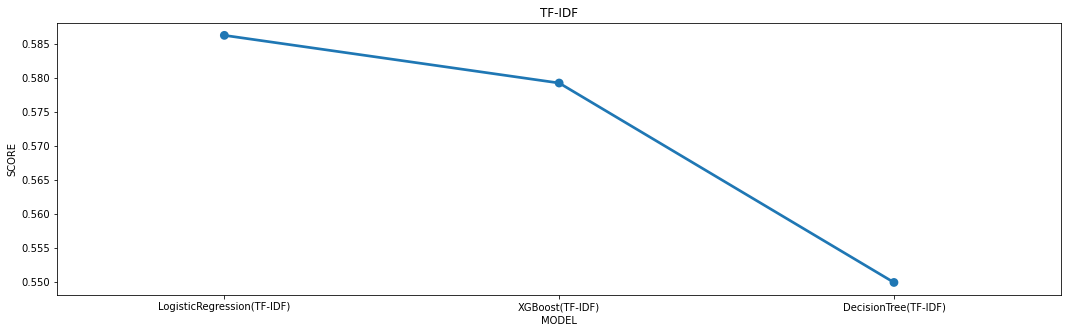

In [74]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

As we can see the best possible model from both Bag-of-Words and TF-IDF is Logistic Regression.

Now, let us compare the score of the Logistic Regression model with both the feature extraction techniques that is Bag-of-Words and TF-IDF.



In [75]:
Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

score_best = [log_bow,log_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.572135,0.586207


Comparison Graph

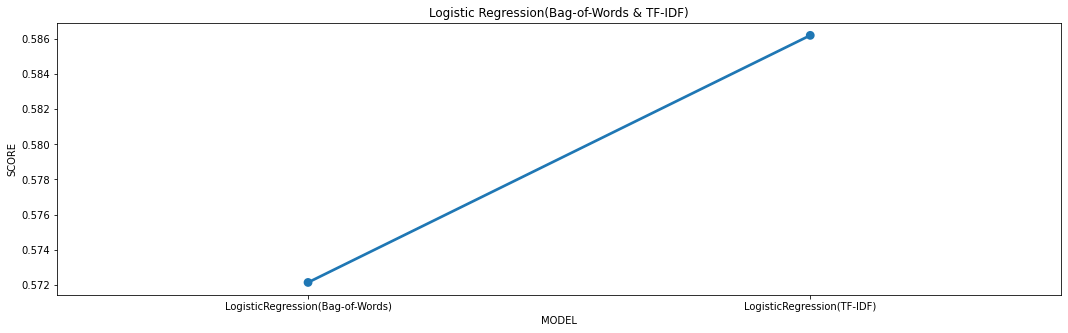

In [76]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

## Predicting the results for our test data
From the above comparison graph we can clearly see that the best possible F1 Score is obtained by the Logistic Regression Model using TF-IDF features.

In [77]:
test_tfidf = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

## Results after Prediction

In [78]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


From the above output we can see that our Logistic Regression model with TF-IDF features predicts whether a tweets falls into the category of Positive — label : 0 or Negative — label : 1 sentiment.

The questions that arises are “What is F1 Score ?” and “Why F1 Score instead of accuracy ?”.

#### Why F1 Score instead of Accuracy ?
Let us generate a countplot for our training dataset labels i.e. ‘0’ or ‘1’ .

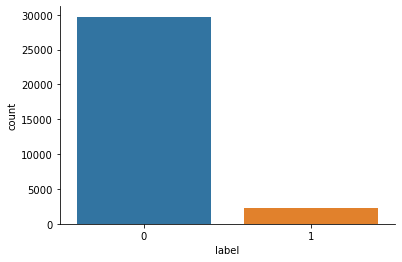

In [79]:
sns.countplot(x=train_original['label'])
sns.despine()

From the above countplot generated above we see how imbalanced our dataset is.

We can see that the values with Positive — label : 0 sentiments are quite high in number as compared to the values with Negative 
— label : 1 sentiments.

So when we keep Accuracy as our evaluation metric there may be cases where we may encounter high number of false positives. So that is why we use F1 Score as our evaluation metric instead of Accuracy.

#### What is F1 Score ?
To know about F1 Score we first have to know about Precision and Recall.

Precision means the percentage of your results which are relevant.
Recall refers to the percentage of total relevant results correctly classified by your algorithm.


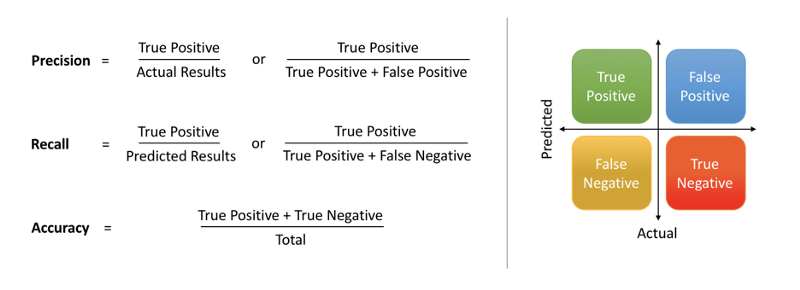

We always face a trade-off situation between Precision and Recall i.e. High Precision gives low Recall and vice versa.

In most problems, you could either give a higher priority to maximising precision, or recall, depending upon the problem you are trying to solve. But in general, there is a simpler metric which takes into account both precision and recall, and therefore, you can aim to maximise this number to make your model better. This metric is known as F1-score, which is simply the harmonic mean of Precision and Recall.

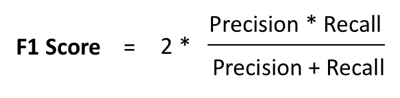

So this metric seems much more easier and convenient to work with, as you only have to maximise one score, rather than balancing two separate scores.